<a href="https://colab.research.google.com/github/SamuelKurianRoy/Multiple-Linear-Regression/blob/main/Predictive_Analytics_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
       Dimensions.Height  Dimensions.Length  Dimensions.Width  \
count        5076.000000        5076.000000       5076.000000   
mean          145.632191         127.825847        144.012411   
std            62.125026          77.358295         79.925899   
min             1.000000           2.000000          1.000000   
25%           104.000000          60.000000         62.000000   
50%           152.000000         128.000000        158.000000   
75%           193.000000         198.000000        219.000000   
max           255.000000         255.000000        254.000000   

       Engine Information.Number of Forward Gears  Fuel Information.City mpg  \
count                                 5076.000000                5076.000000   
mean                                     5.519110                  17.275808   
std                                      0.845637                   4.479485   
min                                      4.000000                   8.000000

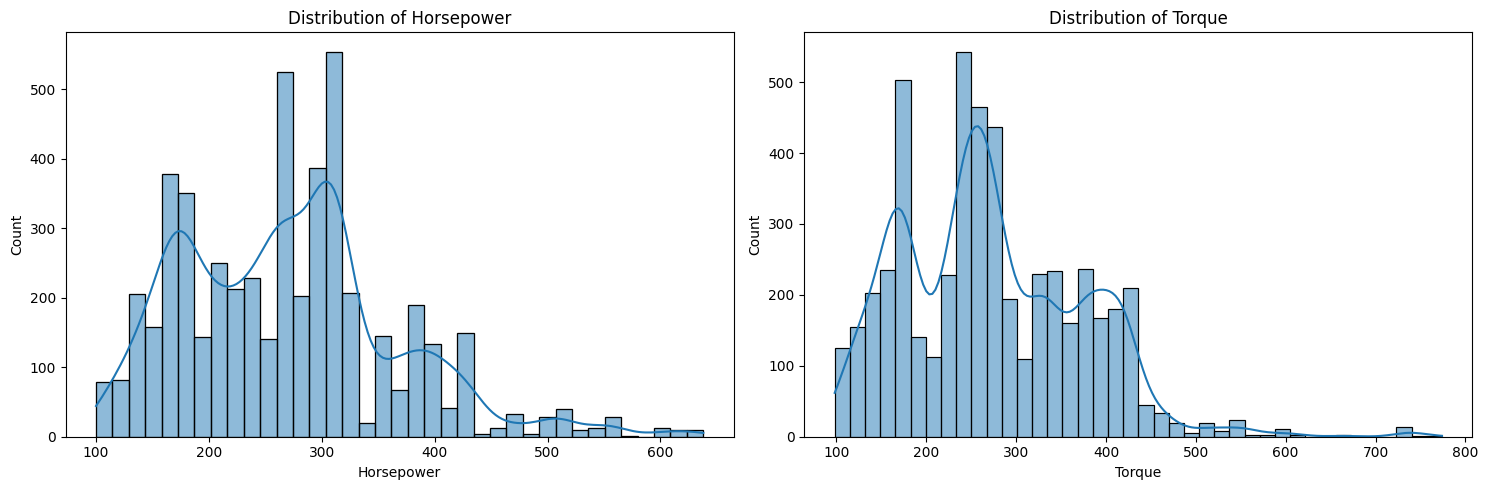

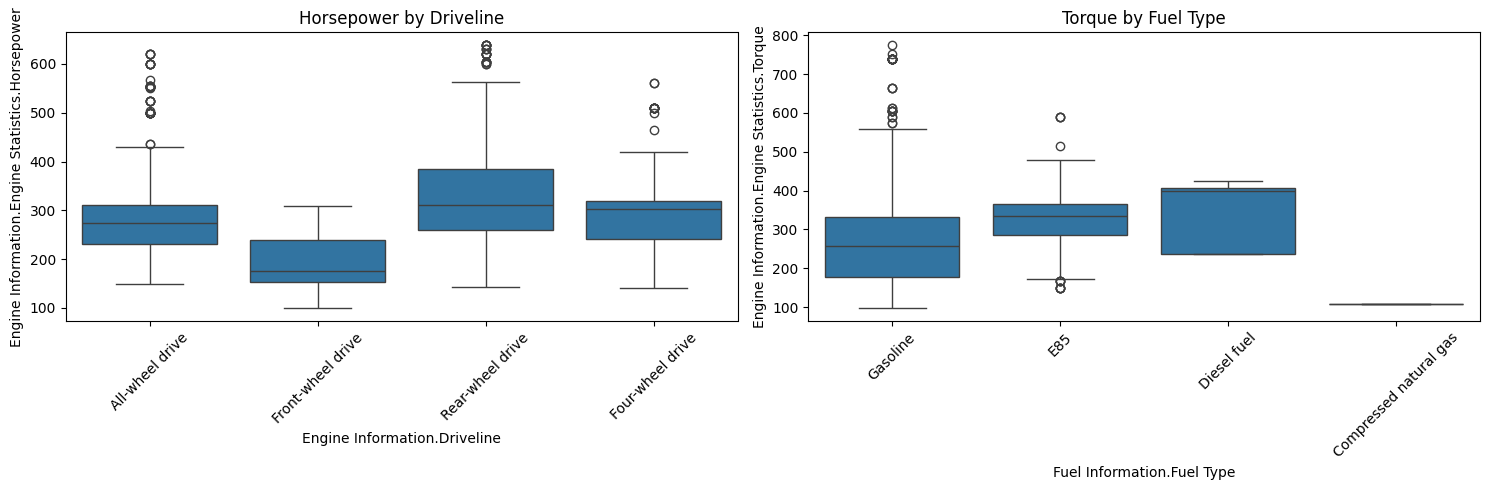

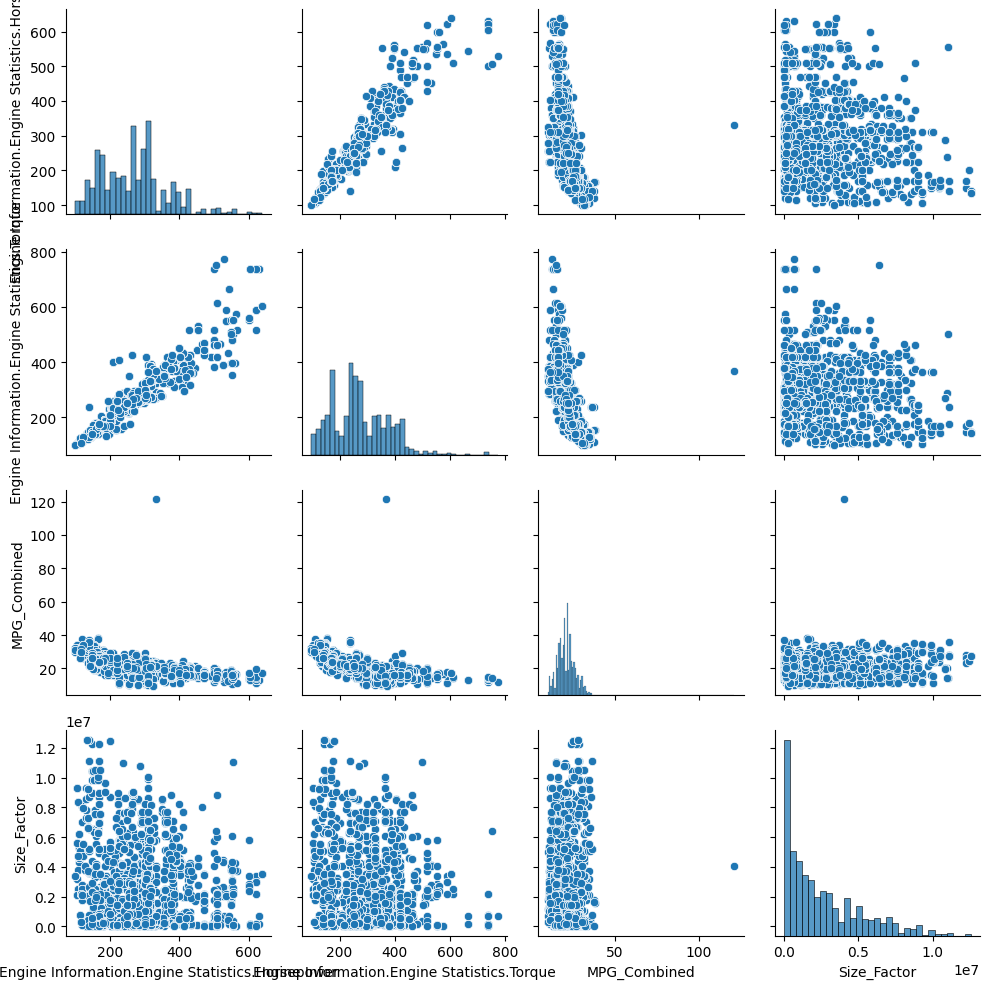

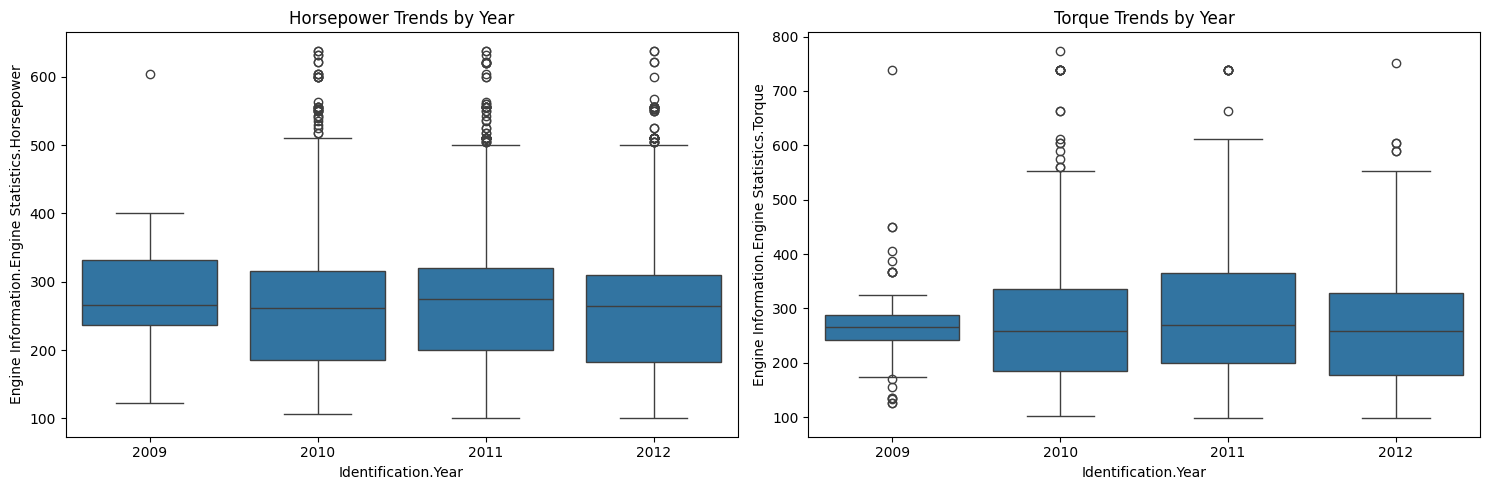

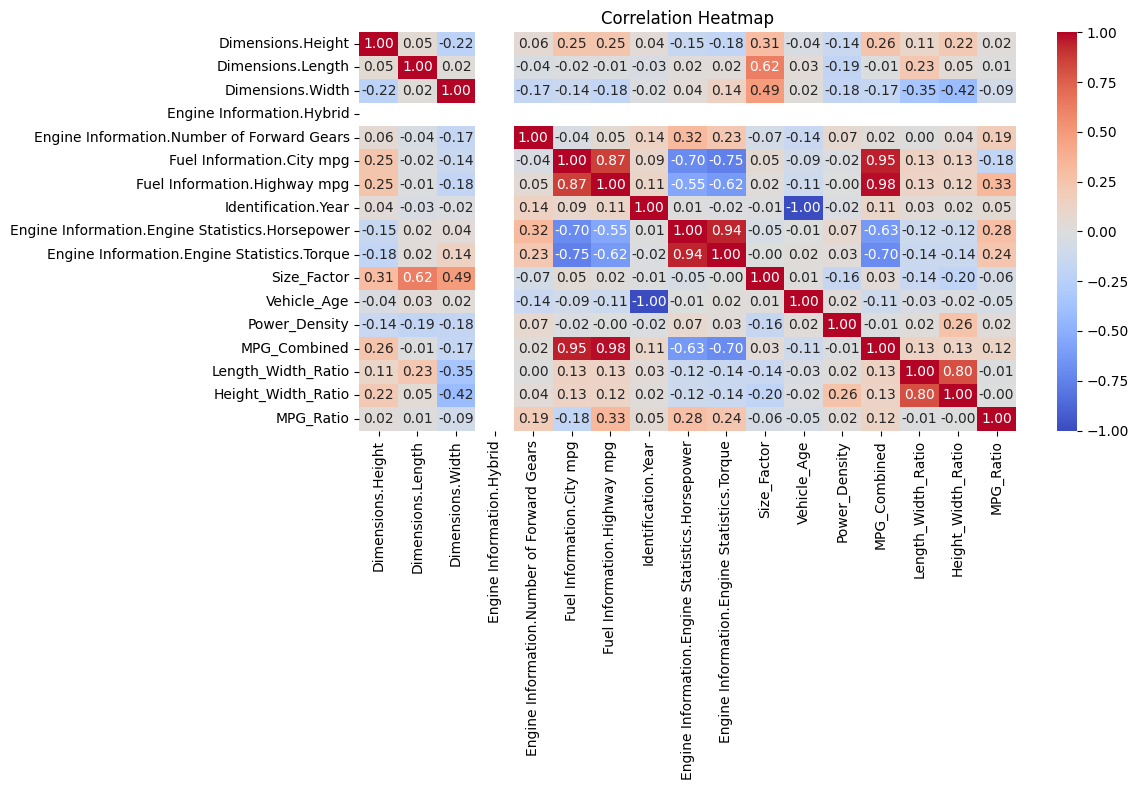


Horsepower Prediction Results:
R² Score: 0.9306
RMSE: 23.87

Torque Prediction Results:
R² Score: 0.9616
RMSE: 18.69


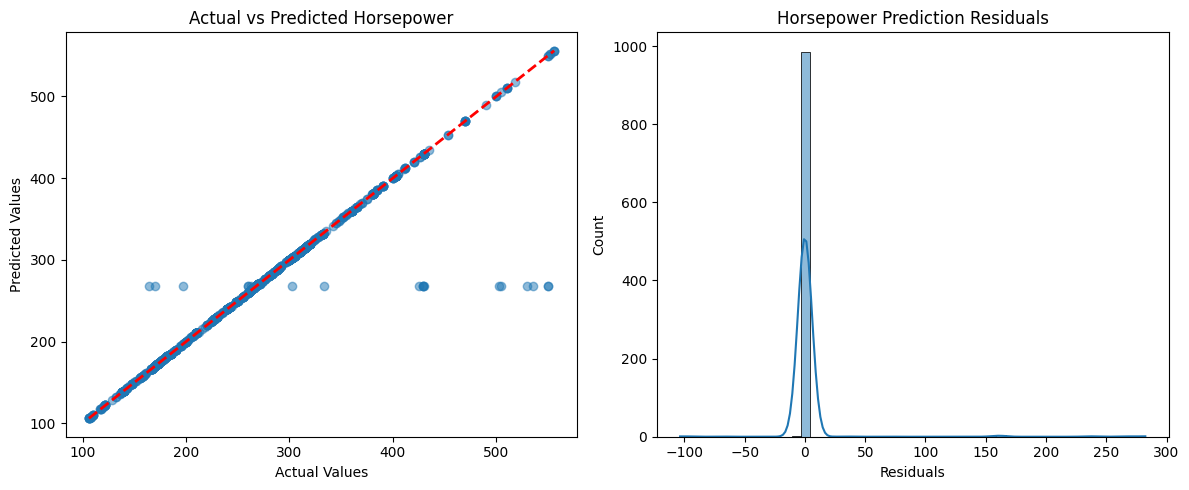

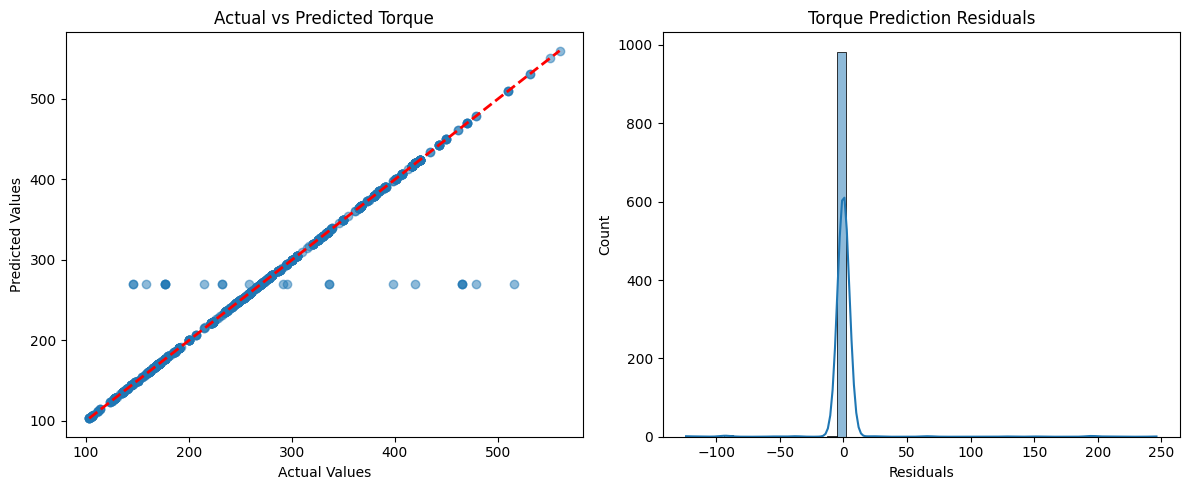


Top 10 Most Important Features for Horsepower:
                                               Feature  Coefficient
157  Engine Information.Engine Type_Chevrolet 6.2L ...    22.049499
116  Engine Information.Engine Type_Cadillac 6.2L 8...    15.153063
115  Engine Information.Engine Type_Cadillac 6.2L 8...    13.917603
198  Engine Information.Engine Type_Dodge 5.7L 8 Cy...    13.470573
323  Engine Information.Engine Type_Jaguar 5.0L 8 C...    13.182036
258  Engine Information.Engine Type_Honda 1.8L 4 Cy...   -12.869025
39   Engine Information.Engine Type_Aston Martin 5....    12.383028
540  Engine Information.Engine Type_Toyota 5.7L 8 C...    10.532591
159  Engine Information.Engine Type_Chevrolet 7.0L ...    10.006109
156  Engine Information.Engine Type_Chevrolet 6.2L ...     9.942131


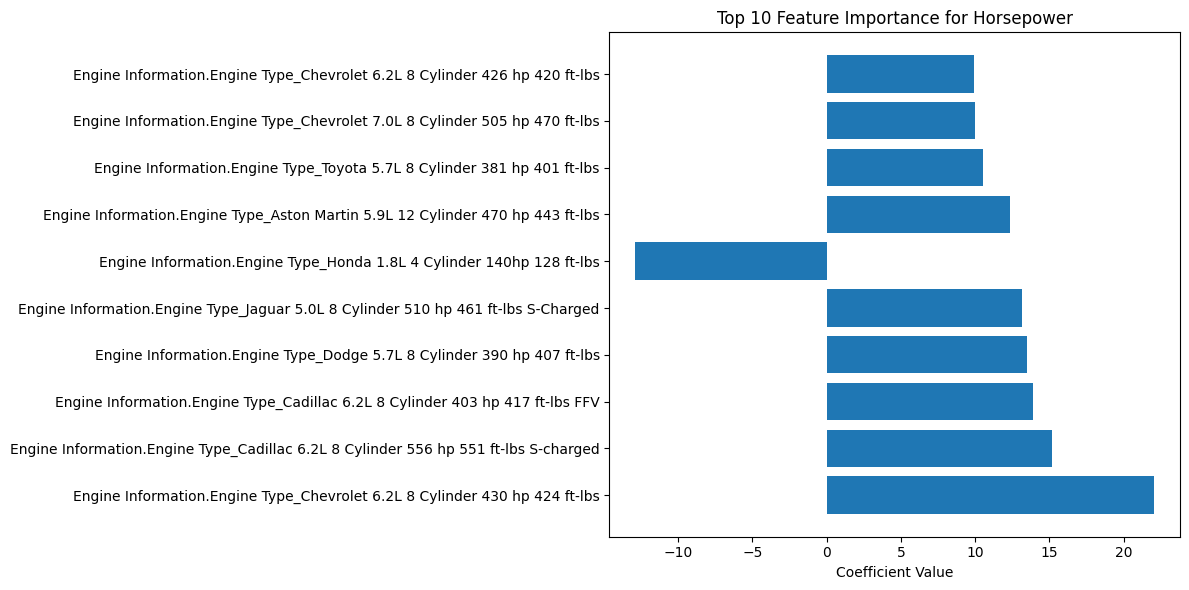


Top 10 Most Important Features for Torque:
                                               Feature  Coefficient
157  Engine Information.Engine Type_Chevrolet 6.2L ...    20.935197
115  Engine Information.Engine Type_Cadillac 6.2L 8...    15.129475
198  Engine Information.Engine Type_Dodge 5.7L 8 Cy...    15.098178
116  Engine Information.Engine Type_Cadillac 6.2L 8...    14.774359
258  Engine Information.Engine Type_Honda 1.8L 4 Cy...   -14.302227
76   Engine Information.Engine Type_BMW 4.4L 8 cyli...    12.384267
219  Engine Information.Engine Type_Ford 3.5L 6 Cyl...    12.274221
473  Engine Information.Engine Type_Nissan 5.6L 8 C...    12.266564
540  Engine Information.Engine Type_Toyota 5.7L 8 C...    12.184779
236  Engine Information.Engine Type_Ford 5.4L 8 cyl...    11.732240


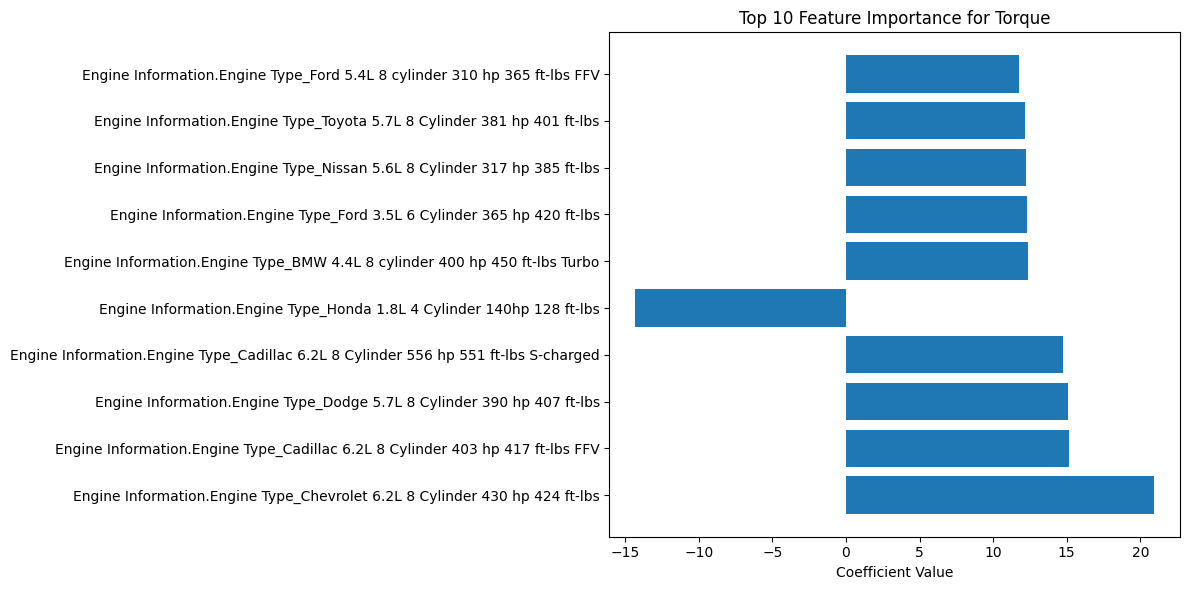

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Reading the dataset
data = pd.read_csv('cars.csv')
df = pd.DataFrame(data)

# Basic data exploration
print("Dataset Overview:")
print(df.describe())
print('\nShape =', df.shape)
print('Number of duplicated values:', df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
print('\nDuplicates Removed')
print('Remaining duplicates:', df.duplicated().sum())

# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())


# Enhanced Feature Engineering
df['Size_Factor'] = df['Dimensions.Length'] * df['Dimensions.Width'] * df['Dimensions.Height']
df['Vehicle_Age'] = 2025 - df['Identification.Year']
df['Power_Density'] = df['Engine Information.Engine Statistics.Horsepower'] / df['Size_Factor']
df['MPG_Combined'] = (df['Fuel Information.Highway mpg'] + df['Fuel Information.City mpg']) / 2

# New engineered features
df['Length_Width_Ratio'] = df['Dimensions.Length'] / df['Dimensions.Width']
df['Height_Width_Ratio'] = df['Dimensions.Height'] / df['Dimensions.Width']
df['MPG_Ratio'] = df['Fuel Information.Highway mpg'] / df['Fuel Information.City mpg']
df['Engine Information.Hybrid'] = df['Engine Information.Hybrid'].map({True: 1, False: 0})

# EDA Visualizations
# 1. Distribution plots for target variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Engine Information.Engine Statistics.Horsepower'], kde=True)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')

plt.subplot(1, 2, 2)
sns.histplot(df['Engine Information.Engine Statistics.Torque'], kde=True)
plt.title('Distribution of Torque')
plt.xlabel('Torque')

plt.tight_layout()
plt.show()

# 2. Box plots for categorical relationships
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Engine Information.Driveline',
            y='Engine Information.Engine Statistics.Horsepower',
            data=df)
plt.xticks(rotation=45)
plt.title('Horsepower by Driveline')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fuel Information.Fuel Type',
            y='Engine Information.Engine Statistics.Torque',
            data=df)
plt.xticks(rotation=45)
plt.title('Torque by Fuel Type')

plt.tight_layout()
plt.show()

# 3. Scatter plot matrix for key numerical features
numerical_features = [
    'Engine Information.Engine Statistics.Horsepower',
    'Engine Information.Engine Statistics.Torque',
    'MPG_Combined',
    'Size_Factor'
]

sns.pairplot(df[numerical_features])
plt.tight_layout()
plt.show()

# 4. Year-wise trends
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Identification.Year',
            y='Engine Information.Engine Statistics.Horsepower',
            data=df)
plt.title('Horsepower Trends by Year')

plt.subplot(1, 2, 2)
sns.boxplot(x='Identification.Year',
            y='Engine Information.Engine Statistics.Torque',
            data=df)
plt.title('Torque Trends by Year')

plt.tight_layout()
plt.show()

# 5. Correlation heatmap for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Define numerical features
numerical_features = [
    'Dimensions.Height',
    'Dimensions.Length',
    'Dimensions.Width',
    'Engine Information.Number of Forward Gears',
    'MPG_Combined',
    'Vehicle_Age',
    'Size_Factor',
    'Power_Density',
    'Length_Width_Ratio',
    'Height_Width_Ratio',
    'MPG_Ratio'
]

# Apply log transformation to highly skewed features
for feature in numerical_features.copy():
    if df[feature].skew() > 1:
        df[f'{feature}_log'] = np.log1p(df[feature])
        numerical_features.remove(feature)
        numerical_features.append(f'{feature}_log')

# One-hot encode categorical variables
categorical_columns = [
    'Engine Information.Driveline',
    'Fuel Information.Fuel Type',
    'Engine Information.Transmission',
    'Engine Information.Engine Type'
]

df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Prepare feature matrix
feature_columns = numerical_features + [col for col in df_encoded.columns
                                      if any(x in col for x in categorical_columns)]
X = df_encoded[feature_columns].reset_index(drop=True)

# Prepare target variables
y_horsepower = df_encoded['Engine Information.Engine Statistics.Horsepower'].reset_index(drop=True)
y_torque = df_encoded['Engine Information.Engine Statistics.Torque'].reset_index(drop=True)

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Remove outliers using numpy arrays
def remove_outliers(X, y, threshold=3):
    z_scores = np.abs(stats.zscore(y))
    mask = z_scores < threshold
    return X.loc[mask], y[mask]

# Remove outliers for both models
X_no_outliers_hp, y_horsepower_clean = remove_outliers(X_scaled, y_horsepower)
X_no_outliers_tq, y_torque_clean = remove_outliers(X_scaled, y_torque)

# Split data for horsepower prediction
X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(
    X_no_outliers_hp, y_horsepower_clean, test_size=0.2, random_state=42
)

# Train horsepower model
hp_model = LinearRegression()
hp_model.fit(X_train_hp, y_train_hp)

# Make horsepower predictions
y_pred_hp = hp_model.predict(X_test_hp)

# Evaluate horsepower model
r2_hp = r2_score(y_test_hp, y_pred_hp)
rmse_hp = np.sqrt(mean_squared_error(y_test_hp, y_pred_hp))

print("\nHorsepower Prediction Results:")
print(f"R² Score: {r2_hp:.4f}")
print(f"RMSE: {rmse_hp:.2f}")

# Split data for torque prediction
X_train_tq, X_test_tq, y_train_tq, y_test_tq = train_test_split(
    X_no_outliers_tq, y_torque_clean, test_size=0.2, random_state=42
)

# Train torque model
torque_model = LinearRegression()
torque_model.fit(X_train_tq, y_train_tq)

# Make torque predictions
y_pred_tq = torque_model.predict(X_test_tq)

# Evaluate torque model
r2_tq = r2_score(y_test_tq, y_pred_tq)
rmse_tq = np.sqrt(mean_squared_error(y_test_tq, y_pred_tq))

print("\nTorque Prediction Results:")
print(f"R² Score: {r2_tq:.4f}")
print(f"RMSE: {rmse_tq:.2f}")

# Visualize results
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(12, 5))  # Adjusted figure size for better display

    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted {title}')

    # Residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    # Explicitly setting a reasonable number of bins for the histogram:
    sns.histplot(residuals, kde=True, bins=50)
    plt.xlabel('Residuals')
    plt.title(f'{title} Prediction Residuals')

    plt.tight_layout()
    plt.show()
    plt.close()

# Plot results
plot_results(y_test_hp, y_pred_hp, "Horsepower")
plot_results(y_test_tq, y_pred_tq, "Torque")

# Feature importance analysis
def display_feature_importance(model, feature_names, target_name):
    coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    print(f"\nTop 10 Most Important Features for {target_name}:")
    print(coefficients.head(10))

    plt.figure(figsize=(12, 6))
    plt.barh(coefficients['Feature'][:10], coefficients['Coefficient'][:10])
    plt.title(f'Top 10 Feature Importance for {target_name}')
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()

# Display feature importance
display_feature_importance(hp_model, X.columns, "Horsepower")
display_feature_importance(torque_model, X.columns, "Torque")